In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

mpl.rc('font', family='NanumGothic') # 폰트 설정
mpl.rc('axes', unicode_minus=False) # 유니코드에서 음수 부호 설정

# 차트 스타일 설정
sns.set(font="NanumGothic", rc={"axes.unicode_minus":False}, style='darkgrid')

warnings.filterwarnings("ignore")

# 1. 정규 분포

$X \sim N(\mu,\sigma^2)$

$
\begin{align}
f(x) = \dfrac{1}{\sigma\sqrt{2\pi}} \exp \left(-\dfrac{(x-\mu)^2}{2\sigma^2}\right)
,\quad -\infty < x < \infty
\end{align}
$

$E(X) = \mu$

$Var(X) = \sigma^2$

평균값을 중심으로 하여 좌우대칭인 종 모양의 분포

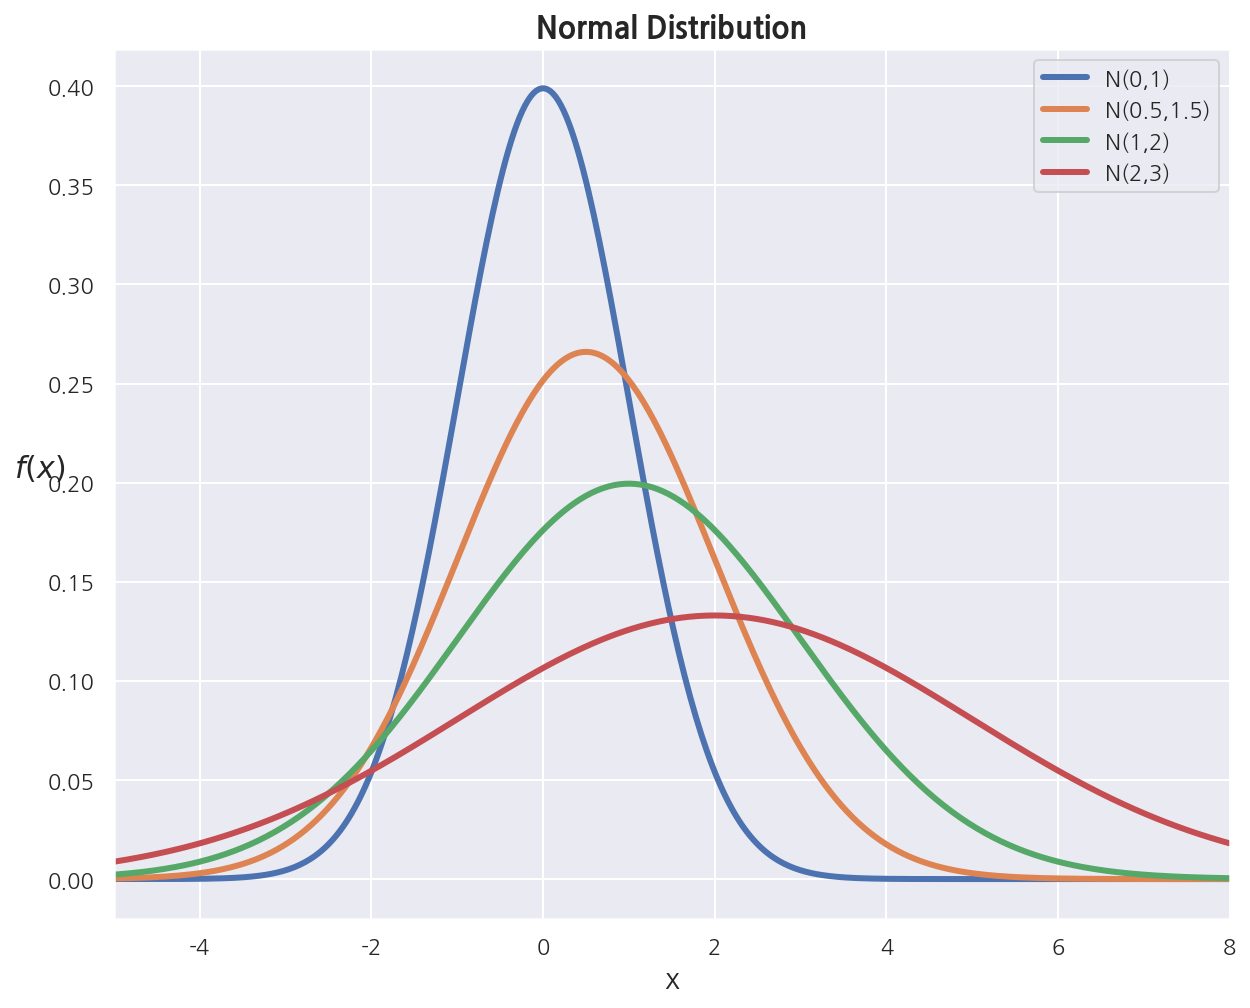

In [3]:
plt.figure(figsize=(10, 8))

x = np.linspace(-8, 8, 500)

y1 = stats.norm(0,1).pdf(x)      # 평균: 0,     분산: 1
y2 = stats.norm(0.5,1.5).pdf(x)  # 평균: 0.5,   분산: 1.5
y3 = stats.norm(1,2).pdf(x)      # 평균: 1,     분산: 3
y4 = stats.norm(2,3).pdf(x)      # 평균: 2,     분산: 4


for i in range(4):
    exec( "plt.plot(x, {0}, lw=3)".format("y"+str(i+1)))


plt.title("Normal Distribution", weight="bold", fontsize=15)
plt.xlabel("x", fontsize=15)
plt.ylabel("$f(x)$", rotation = 0, fontsize=15)

plt.xlim(-5,8)
plt.legend(["N(0,1)", "N(0.5,1.5)", "N(1,2)", "N(2,3)"])

plt.show()

- 평균이 증가함에 따라 그래프가 우측으로 x축 이동한다.
- 분산이 증가함에 따라 흩어짐 정도가 커져 완만한 모습이 된다.

# 2. 이항 분포

$X \sim Bin(n,p)$

$
\begin{align}
p(x) = \binom n x \; p^x(1-p)^{n-x}
, \quad x=0, ... n
\end{align}
$

$E(X) = np$

$Var(X) = np(1-p)$

특정 사건이 발생할 확률이 p이고 n번 독립 시행하였을 때 사건이 x번 발생할 확률

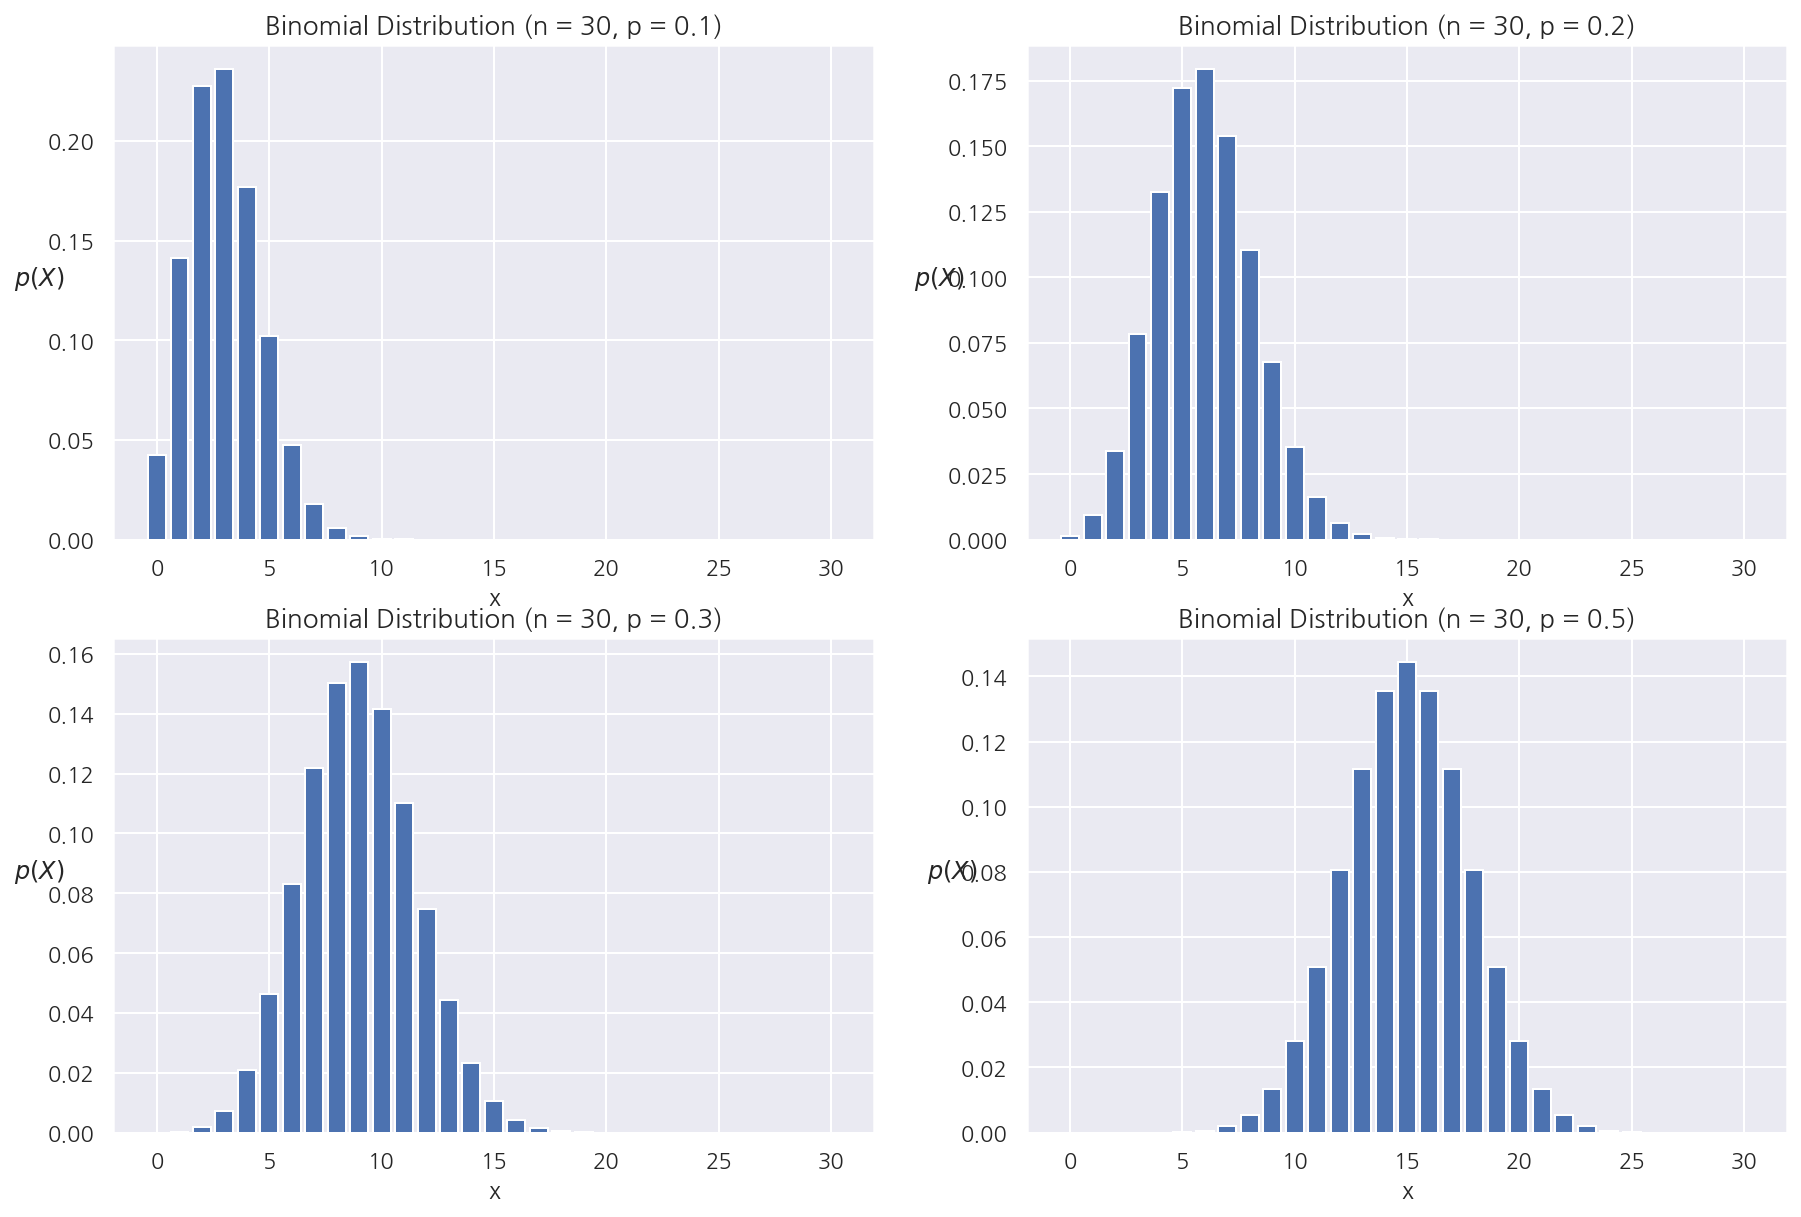

In [4]:
fig, axs = plt.subplots(2,2, figsize=(15,10))

p = np.array( [[0.1,0.2],
               [0.3,0.5]] )

x = range(0,31)

for row in range(2):
    for col in range(2):
        y = stats.binom(30, p[row,col]).pmf(x)
        
        axs[row,col].bar(x, y)
        axs[row,col].set_title("Binomial Distribution (n = 30, p = {0})".format(p[row,col]),
                                fontsize=13)
        axs[row,col].set_xlabel("x")
        axs[row,col].set_ylabel("$p(X)$", rotation=0)

        
plt.show()

- n을 고정하고 p를 증가시켰을 때 점차적으로 정규분포 형태와 근사하는 것을 알 수 있다.
- p가 0과 1에서 멀어질수록 정규분포와 근사한다.

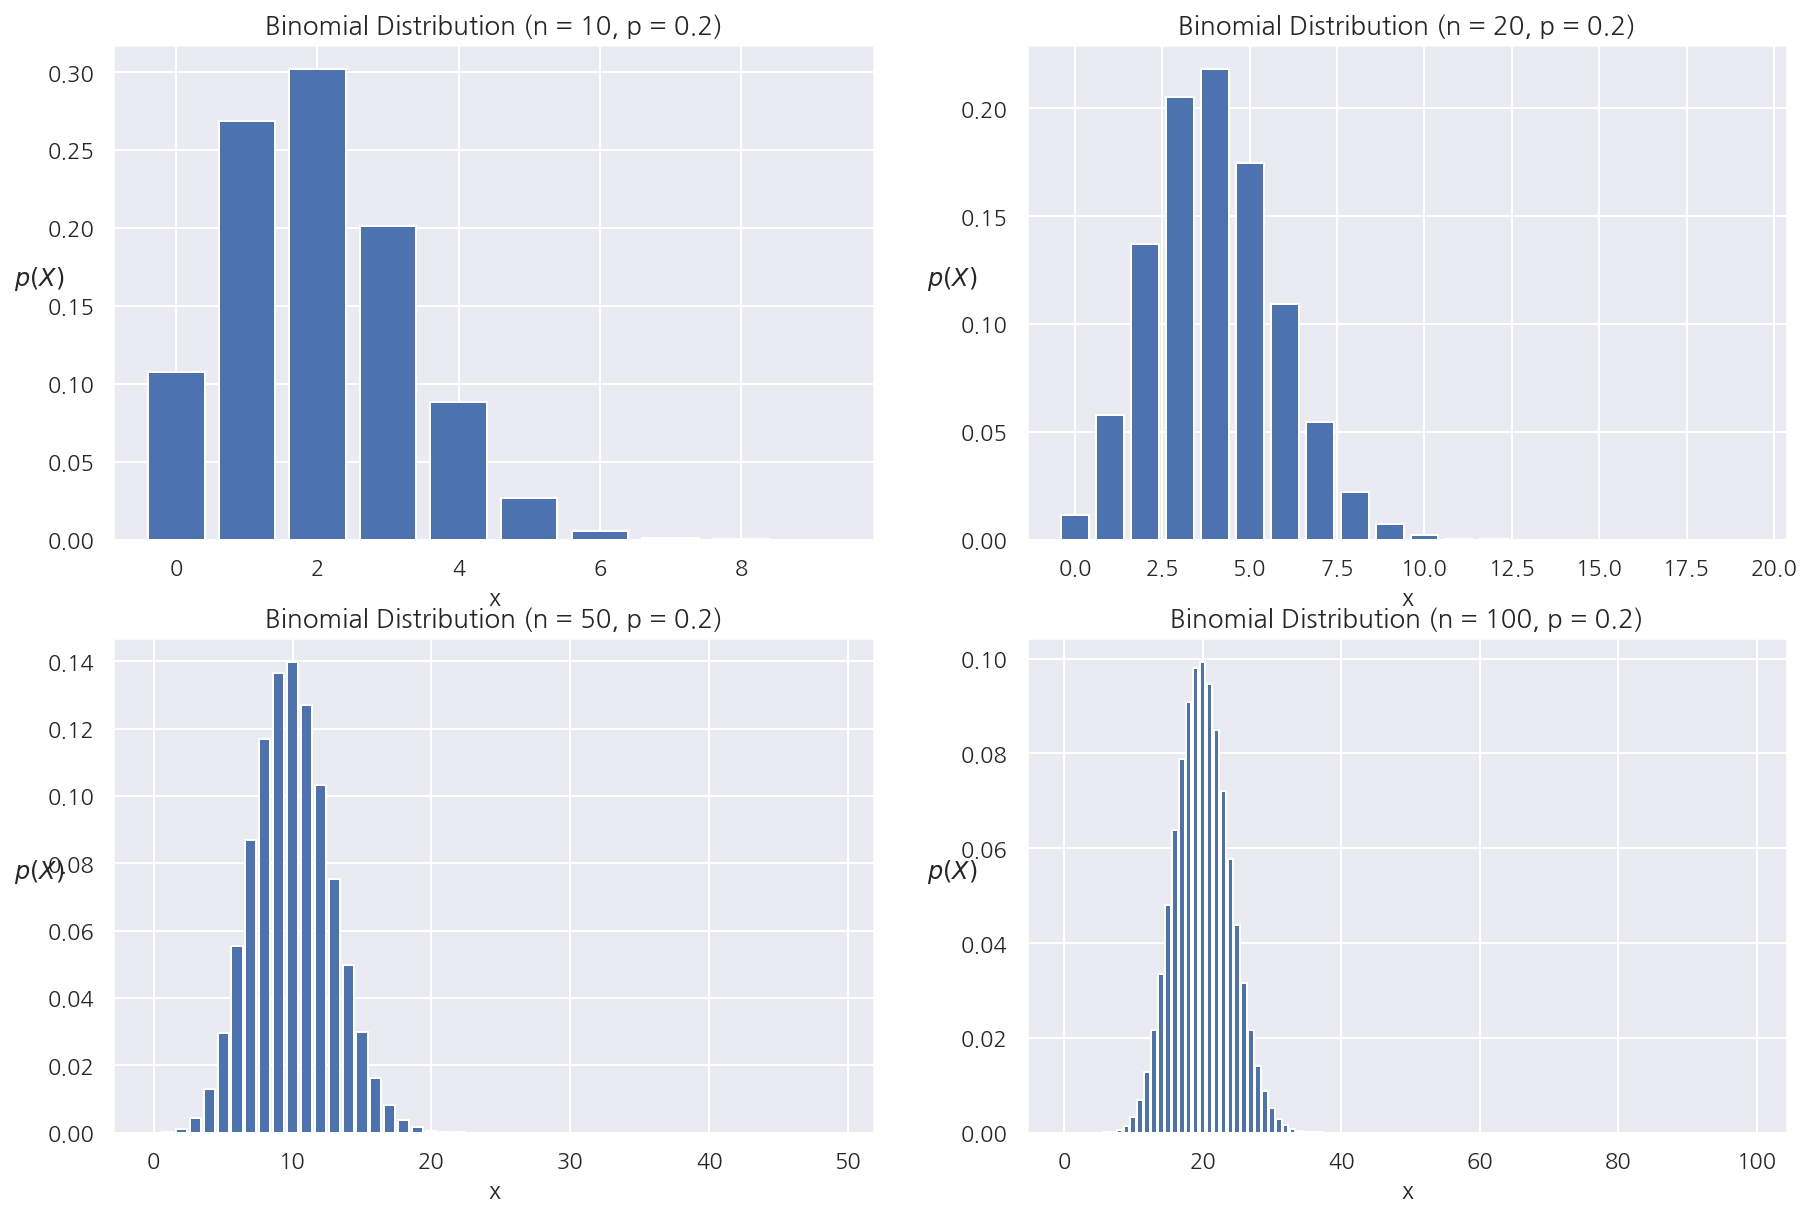

In [5]:
fig, axs = plt.subplots(2,2, figsize=(15,10))

n = np.array( [[10,20],
               [50,100]] )


for row in range(2):
    for col in range(2):
        x = list(range(0, n[row,col]))
        y = stats.binom(n[row,col], 0.2).pmf(x)
        
        axs[row,col].bar(x, y)
        axs[row,col].set_title("Binomial Distribution (n = {0}, p = 0.2)".format(n[row,col]),
                                fontsize=13)
        axs[row,col].set_xlabel("x")
        axs[row,col].set_ylabel("$p(X)$", rotation=0)

        
plt.show()

- p를 고정하고 n을 증가시켰을 때 점차적으로 정규분포 형태와 근사하는 것을 알 수 있다.
- 표본의 크기 n이 증가할수록 정규분포와 근사한다.

# 3. 포아송 분포

$X \sim Poisson(\lambda)$

$
\begin{align}
p(x) = e^{-\lambda} \ \dfrac{\lambda^x}{x!}
, \quad x=0, ... \infty
\end{align}
$

$E(X) = \lambda$

$Var(X) = \lambda$

주어진 시간 또는 영역에서 어떤 사건의 평균발생횟수 $\lambda$를 알고 있을때 사건이 x번 발생할 확률

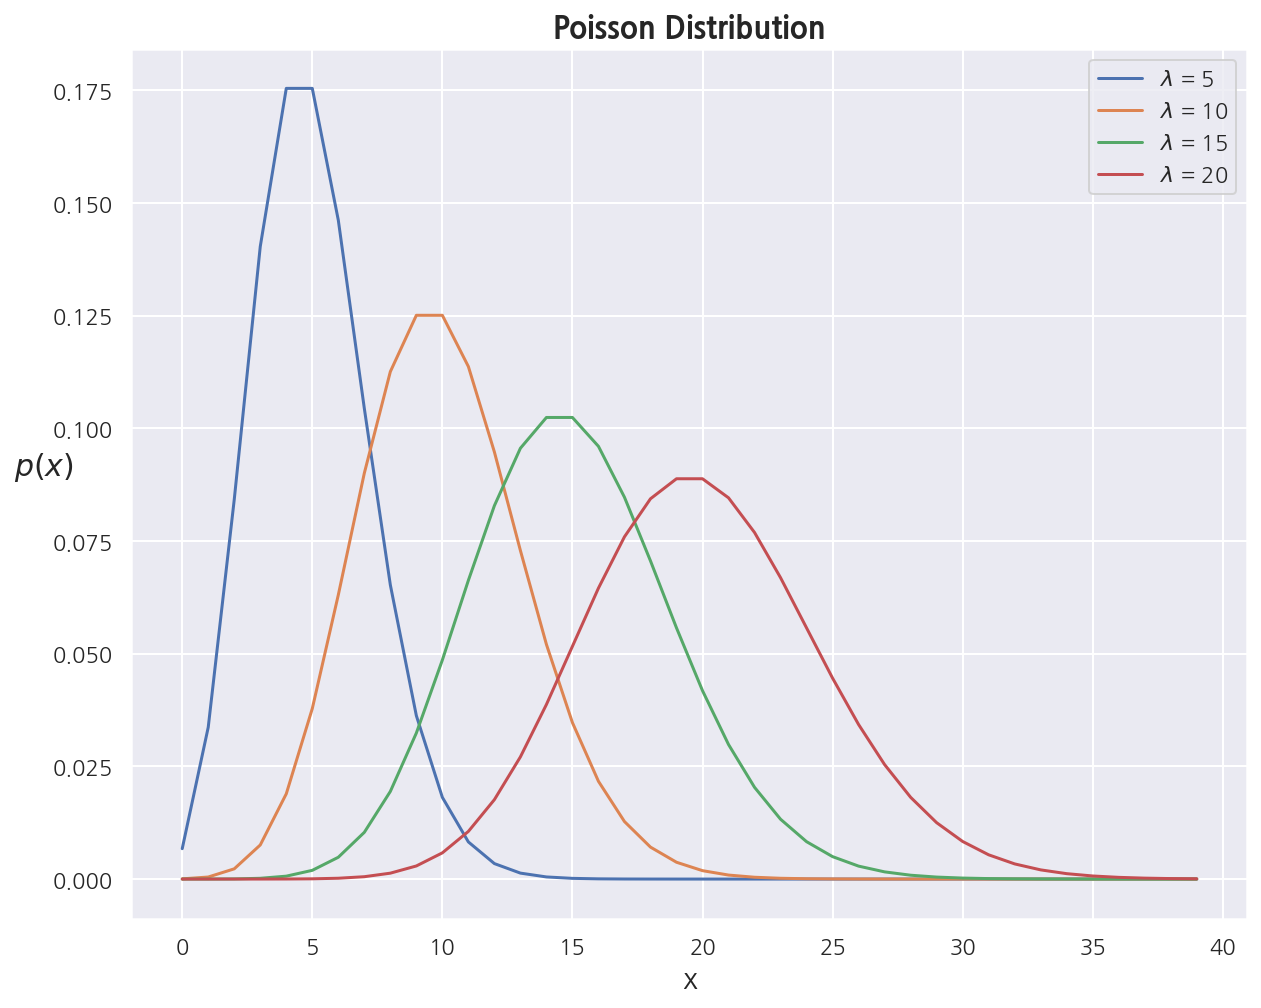

In [6]:
x = np.arange(40)

plt.figure(figsize=(10, 8))

for lam in np.linspace(5,20,4):
    y = stats.poisson(lam).pmf(x)
    plt.plot(x, y, label = f"$\lambda$ = {int(lam)}")

plt.title('Poisson Distribution', weight="bold", fontsize=15)
plt.xlabel('x', fontsize=15)
plt.ylabel("$p(x)$", rotation = 0, fontsize=15)
plt.legend()

plt.show()

- 포아송분포는 평균과 분산이 같으므로 $\lambda$가 증가함에 따라 우측으로 이동하면서 완만해지는 모습이다.

# 4. 지수 분포

$X \sim \exp(\lambda)$

$
\begin{align}
f(x) = \dfrac{1}{\lambda}  e^{-\frac{1}{\lambda}x}
, \quad 0 < x < \infty
\end{align}
$

$E(X) = \lambda$

$Var(X) = \lambda^2$

사건과 사건사이 평균시간 $\lambda$를 알고 있을 때 특정 사건이 1회 발생하기까지 걸리는 시간

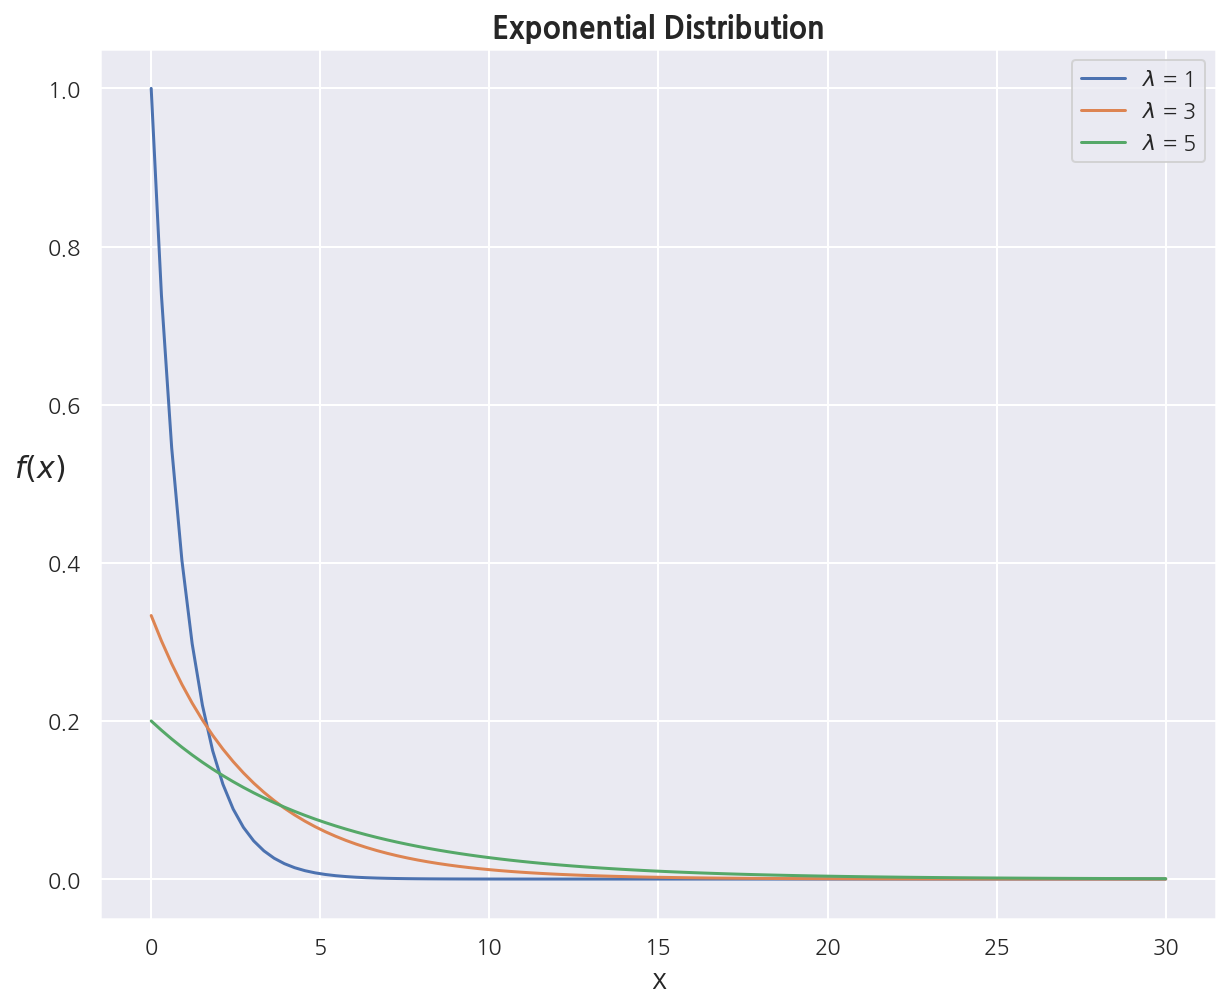

In [7]:
x = np.linspace(0, 30, 100)

plt.figure(figsize=(10, 8))

for lam in [1, 3, 5]:
    loc = 0
    y = stats.expon(loc, lam).pdf(x)
    plt.plot(x, y, label = f"$\lambda$ = {lam}")

plt.title('Exponential Distribution', weight="bold", fontsize=15)
plt.xlabel('x', fontsize=15)
plt.ylabel("$f(x)$", rotation = 0, fontsize=15)
plt.legend()

plt.show()

- $\lambda$가 증가함에 따라 분포가 완만해지는 모습이다.

# 5. 카이제곱 분포

$X \sim \chi^2 (k)$

$
\begin{align}
f(x) = C_k \ x^{\frac{k}{2}-1} \exp\left(-\dfrac{x}{2}\right)
, \quad 0 < x < \infty
\end{align}
$

$E(X) = k$

$Var(X) = 2k$

$k$는 자유도이며 $C_k = 1 \ / \ {\Gamma(\frac{k}{2}) 2^{\frac{k}{2}}}$이다.

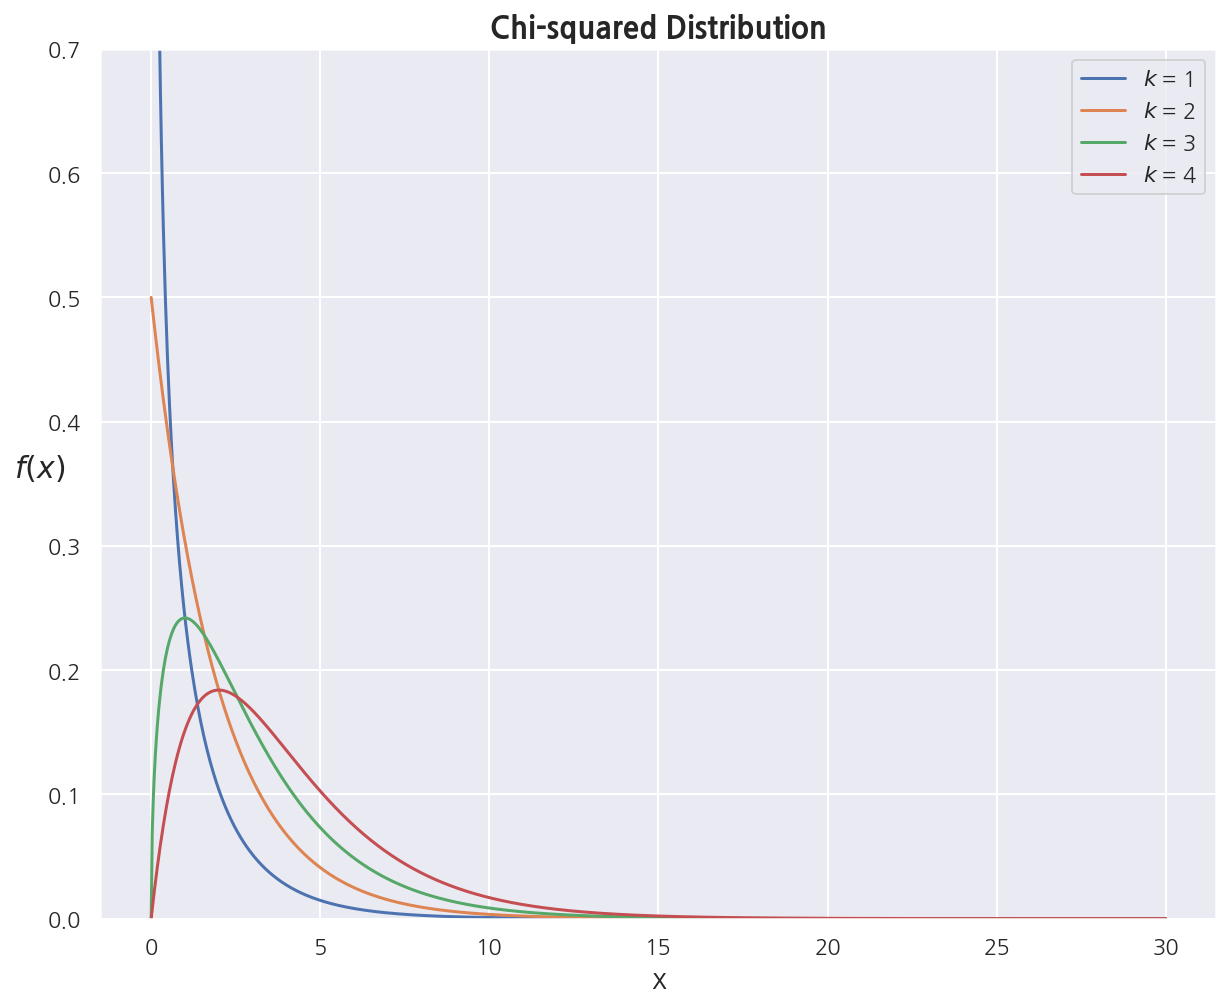

In [8]:
x = np.linspace(0, 30, 1000)

plt.figure(figsize=(10, 8))

for df in range(4):
    y = stats.chi2(df+1).pdf(x)
    plt.plot(x, y, label = f"$k$ = {df+1}")

plt.title('Chi-squared Distribution', weight="bold", fontsize=15)
plt.xlabel("x", fontsize=15)
plt.ylabel("$f(x)$", rotation = 0, fontsize=15)

plt.ylim(0,0.7)
plt.legend()

plt.show()

- 자유도가 1,2인 경우 x값이 증가함에 따라 확률밀도가 작아지는 형태이다.
- 자유도가 2인 경우 $\lambda = 2$인 지수분포가 된다.
- 자유도가 3보다 커지면 단봉형태가 된다.

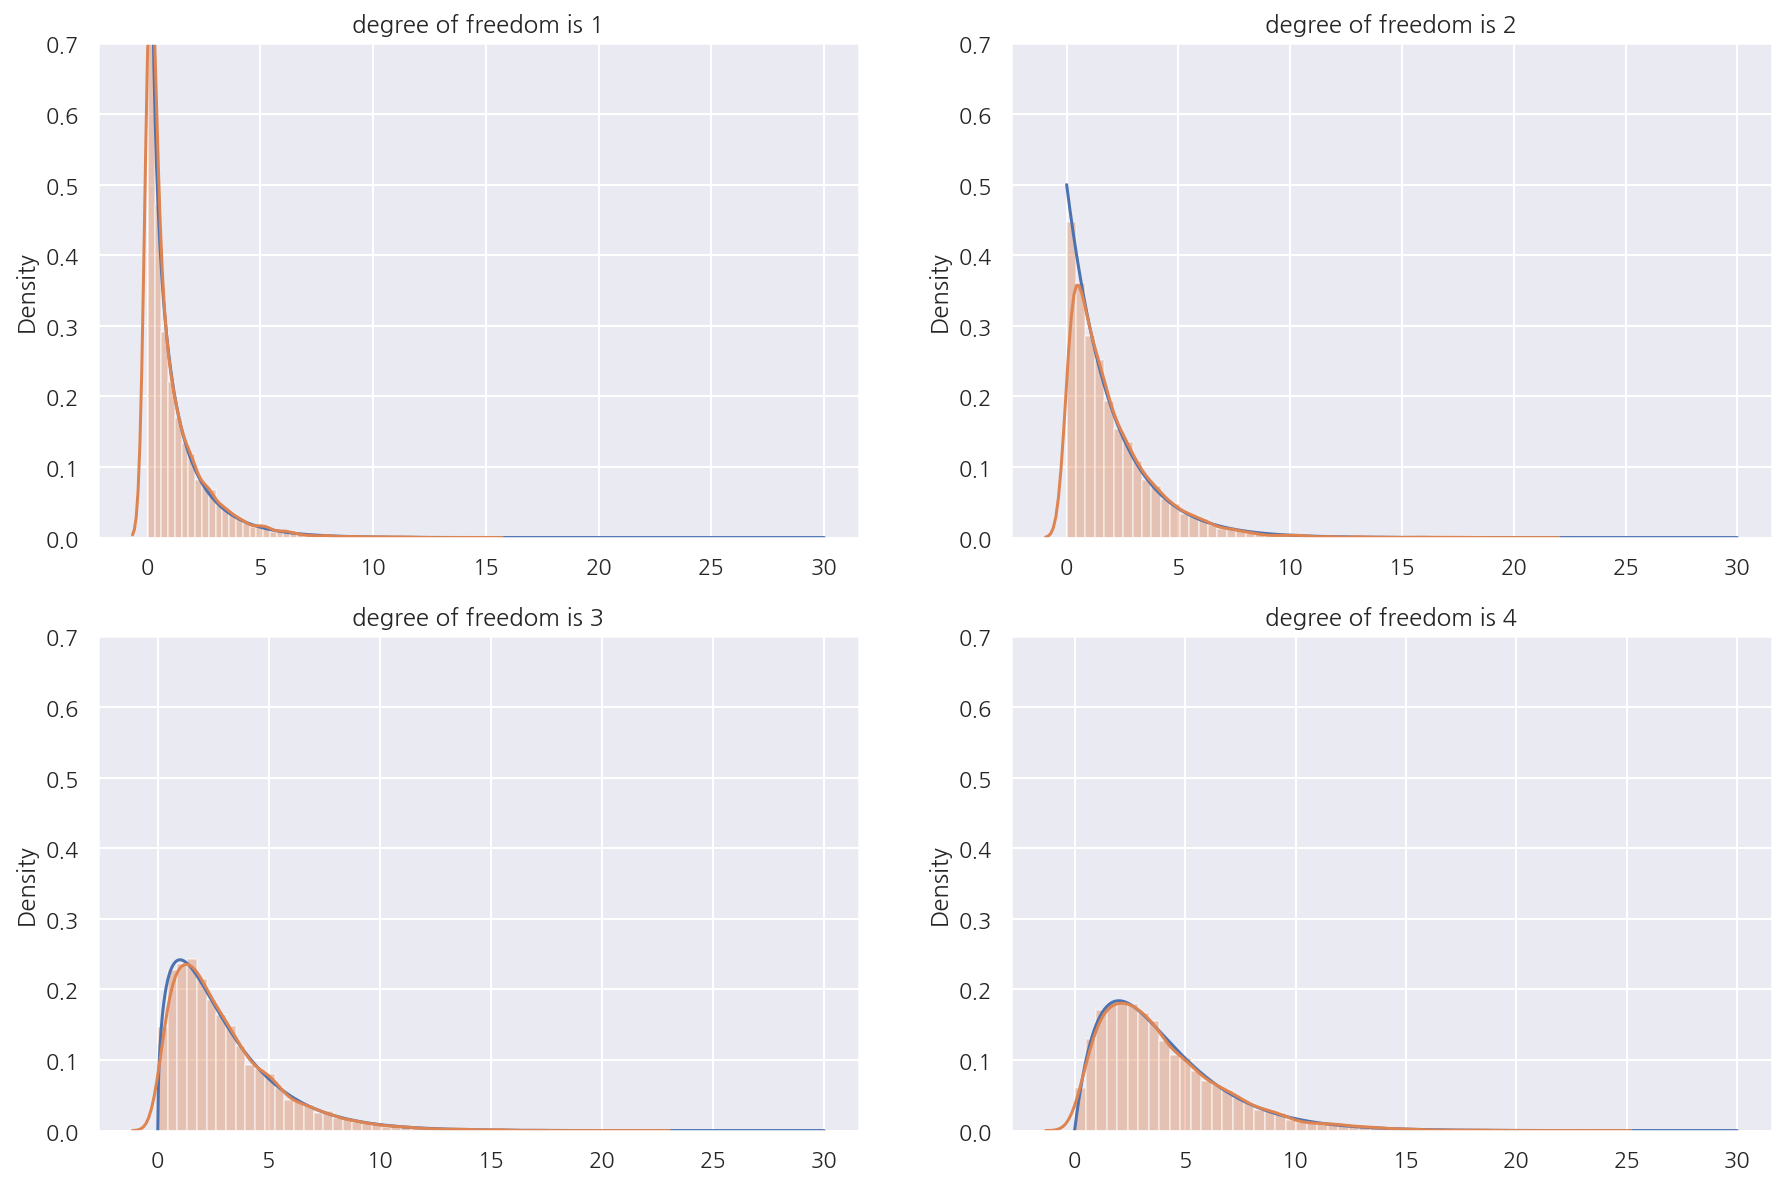

In [9]:
fig, axs = plt.subplots(2,2, figsize=(15,10))


N = np.arange(4).reshape(2,2) + 1 # 표본집단 수 = 카이제곱 자유도
n = 10000 # 각 표본 샘플수


for row in range(2):
    for col in range(2):
        z_square = []
        
        # N개 표본집단의 표준정규분포 제곱합 (샘플수 = n)
        for _ in range(n): 
            z = stats.norm().rvs(N[row,col])
            z_square.append((z*z).sum())


        # 카이제곱 분포 그리기
        x = np.linspace(0, 30, 1000)
        y = stats.chi2(N[row,col]).pdf(x)
        axs[row,col].plot(x, y)
        axs[row,col].set_ylim(0,0.7)

        # 표준정규분포 제곱합 그리기
        sns.distplot(z_square, ax=axs[row,col])

        axs[row,col].set_title(f"degree of freedom is {N[row,col]}")


plt.show()

$
\begin{align}
\sum_{i=1}^k z_i^2 \sim \chi^2 (k)
\end{align}
$

- 표준정규분포의 제곱합은 카이제곱분포를 따른다.

# 6. 감마 분포

# 7. Student - t분포

# 8. F 분포

# 9. 요약정리예정
지수분포는 감마분포에서 알파가 1인 특수 케이스

카이제곱분포는 감마분포에서 알파는 k/2형태 베타는 2인 특수 케이스

t/카이제곱은 정규분포

카이제곱/카이제곱은 f분포